In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('movies_imdb_clean.csv')

In [3]:
df.head()

,movie,year,imdbID,genre,runtime,rating,metascore,director,votes,stars,...,k_sex,k_f rated,k_murder,k_love,k_female protagonist,k_friendship,k_revenge,k_police,k_new york city,k_sequel
0,The Dark Knight: Le chevalier noir,2008,/title/tt0468569/,"['Action', 'Crime', 'Drama']",152,9.0,0.84,Christopher Nolan,2161024,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",...,0,0,0,0,0,0,0,0,0,0
1,Inception,2010,/title/tt1375666/,"['Action', 'Adventure', 'Sci-Fi']",148,8.8,0.74,Christopher Nolan,1909234,"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...",...,0,0,0,0,0,0,0,0,0,0
2,Le seigneur des anneaux: La communauté de l'an...,2001,/title/tt0120737/,"['Adventure', 'Drama', 'Fantasy']",178,8.8,0.92,Peter Jackson,1561138,"['Elijah Wood', 'Ian McKellen', 'Orlando Bloom']",...,0,0,0,0,0,0,0,0,0,0
3,Le seigneur des anneaux: Le retour du roi,2003,/title/tt0167260/,"['Adventure', 'Drama', 'Fantasy']",201,8.9,0.94,Peter Jackson,1549252,"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...",...,0,0,0,0,0,0,0,0,0,0
4,The Dark Knight Rises,2012,/title/tt1345836/,"['Action', 'Thriller']",164,8.4,0.78,Christopher Nolan,1431808,"['Christian Bale', 'Tom Hardy', 'Anne Hathaway']",...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['movie', 'year', 'imdbID', 'genre', 'runtime', 'rating', 'metascore',
       'director', 'votes', 'stars', 'writer', 'plot_keywords', 'languages',
       'country', 'cum_worldwide_gross', 'star_Nicolas Cage',
       'star_Samuel L. Jackson', 'star_Robert De Niro', 'star_Nicole Kidman',
       'star_Ewan McGregor', 'star_Morgan Freeman', 'star_Bruce Willis',
       'star_Mark Wahlberg', 'star_James Franco', 'star_Julianne Moore',
       'star_Owen Wilson', 'star_Matt Damon', 'star_Ryan Reynolds',
       'star_Liam Neeson', 'star_Naomi Watts', 'writer_category',
       'language_English', 'language_French', 'language_Spanish',
       'language_German', 'language_Italian', 'language_Japanese',
       'language_Russian', 'language_Mandarin', 'language_Arabic', 'age',
       'genre_Drama', 'genre_Romance', 'genre_War', 'genre_Thriller',
       'genre_Crime', 'genre_Adult', 'genre_Music', 'genre_Horror',
       'genre_Family', 'genre_Comedy', 'genre_Action', 'genre_Sci-Fi',
       'ge

In [5]:
columns_for_analysis = ['runtime', 'rating', 'metascore',
        'votes', 'star_Nicolas Cage',
       'star_Samuel L. Jackson', 'star_Robert De Niro', 'star_Nicole Kidman',
       'star_Ewan McGregor', 'star_Morgan Freeman', 'star_Bruce Willis',
       'star_Mark Wahlberg', 'star_James Franco', 'star_Julianne Moore',
       'star_Owen Wilson', 'star_Matt Damon', 'star_Ryan Reynolds',
       'star_Liam Neeson', 'star_Naomi Watts', 'writer_category',
       'language_English', 'language_French', 'language_Spanish',
       'language_German', 'language_Italian', 'language_Japanese',
       'language_Russian', 'language_Mandarin', 'language_Arabic', 'age',
       'genre_Drama', 'genre_Romance', 'genre_War', 'genre_Thriller',
       'genre_Crime', 'genre_Adult', 'genre_Music', 'genre_Horror',
       'genre_Family', 'genre_Comedy', 'genre_Action', 'genre_Sci-Fi',
       'genre_Musical', 'genre_Adventure', 'genre_Animation', 'genre_History',
       'genre_Mystery', 'genre_Western', 'genre_Biography', 'genre_Sport',
       'genre_Fantasy', 'director_category', 'country_category',
       'log_cum_worldwide_gross', 'k_nudity', 'k_sex',
       'k_f rated', 'k_murder', 'k_love', 'k_female protagonist',
       'k_friendship', 'k_revenge', 'k_police', 'k_new york city', 'k_sequel']

In [6]:
df2 = df[columns_for_analysis].copy()

In [7]:
df2.shape

(6335, 65)

In [124]:
df2.to_csv('imdb_cols_for_model.csv',index=False)

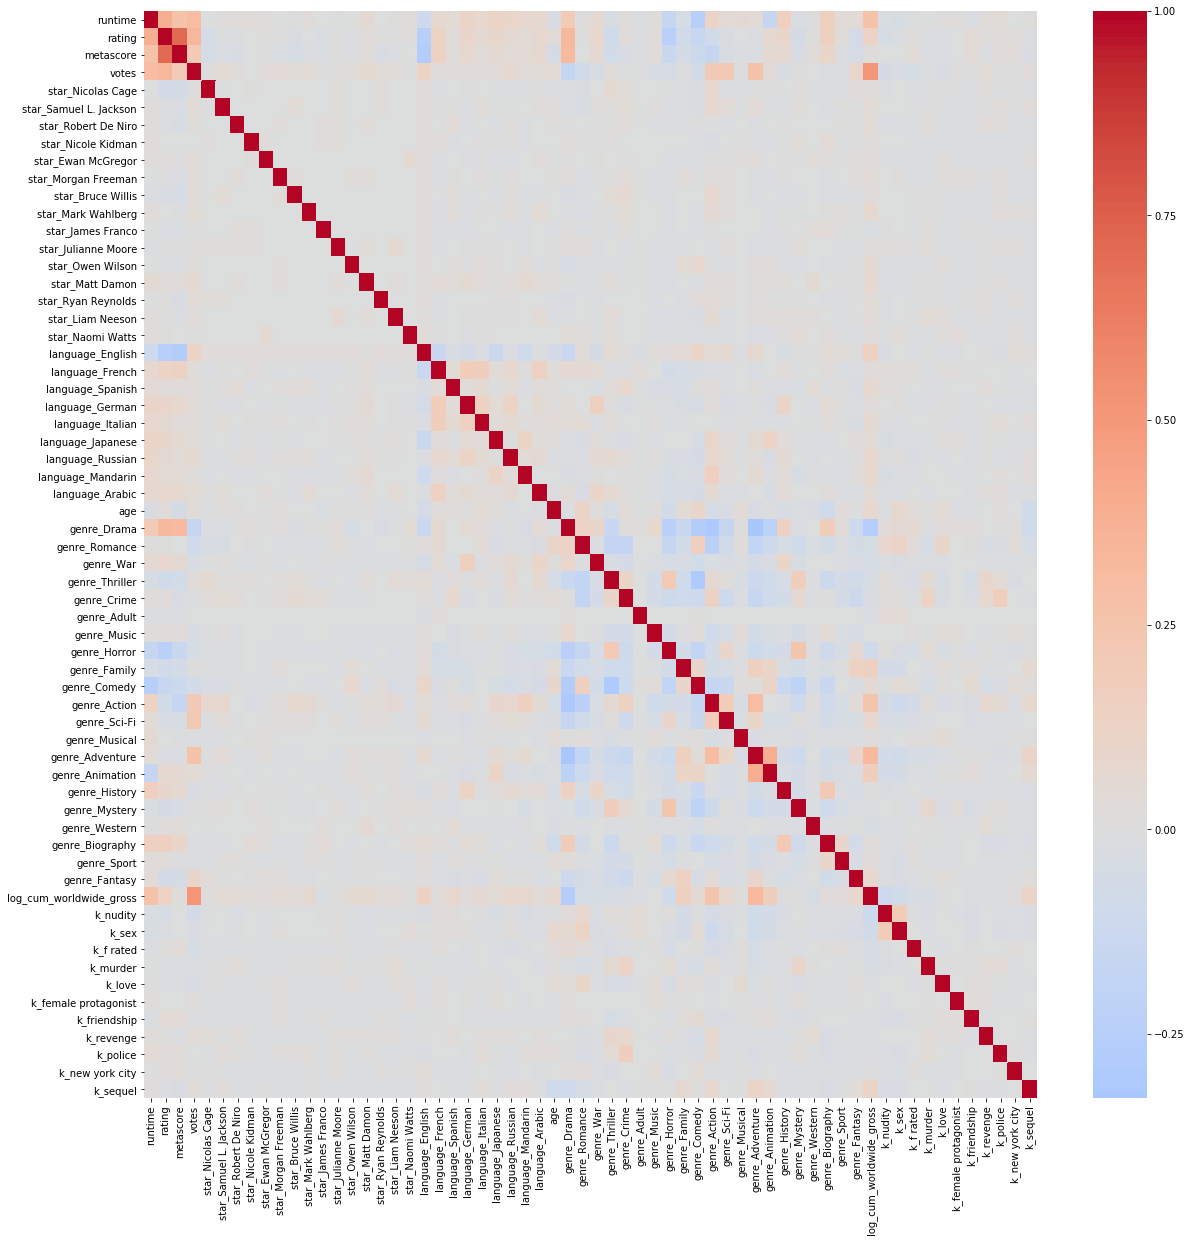

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(), cmap='coolwarm', center=0)

In [ ]:
# we can't see much, except:
# - genres seem correlated to each other
# - the 4 first features seem correlated to each other

In [10]:
numerical_columns = ['runtime', 'rating', 'metascore', 'votes', 'age','log_cum_worldwide_gross']

In [11]:
categorical_columns = [x for x in df2.columns if x not in numerical_columns]

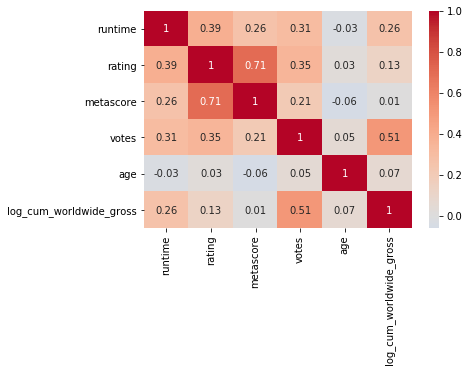

In [15]:
sns.heatmap(round(df2[numerical_columns].corr(),2), cmap='coolwarm', center=0, annot = True)

- **rating** and **metascore** are highly correlated: they are 2 rating systems
- number of **votes** and **cumulative worldwide gross** are correlated: the more revenue a movie has, the more people saw the movie and the more people vote for the movie

In [ ]:
lst_genre=[x for x in categorical_columns if x.startswith('genre_')]

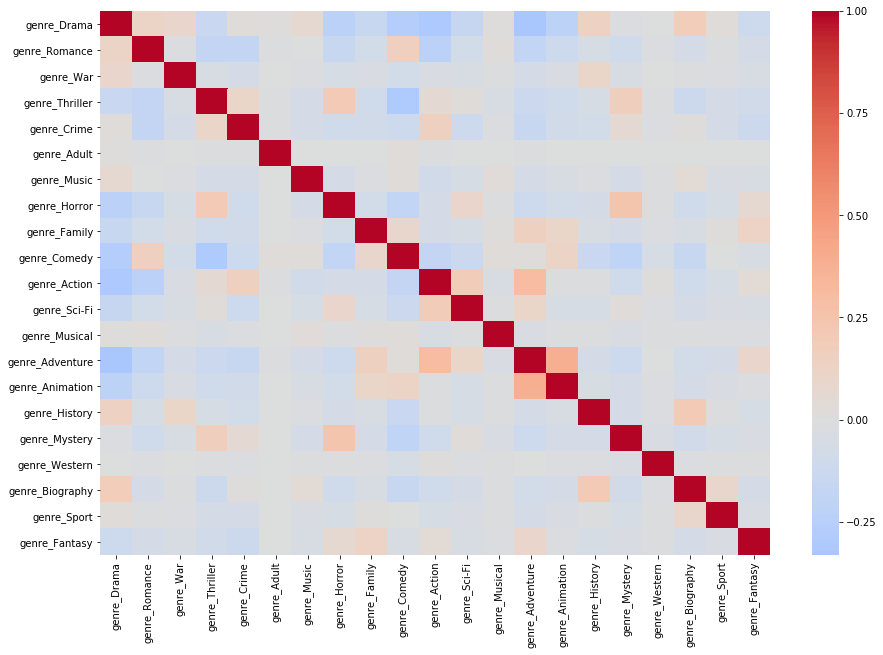

In [123]:
plt.figure(figsize=(15,10))
sns.heatmap(df2[lst_genre].corr(),cmap='coolwarm', center=0)

In [ ]:
# some genre are correlated with each other:
# positive correlation between Adventure and Action; Adventure and Animation; Horror and Mystery; Thriller and Horror etc... these genres are often associated
# negative correlation between Comedy and Thriller; Drama and Comedy; Romance and Action, etc... these genres are rarely associated

##### average rating group by category

1. Writer

In [26]:
writer_mean_rating=df2[['rating','writer_category']].groupby(by='writer_category', as_index=False).mean().sort_values(by=['rating'], ascending=False)

In [27]:
writer_mean_rating

,writer_category,rating
10,Paul Laverty,7.310000
5,Lars von Trier,7.070000
3,John Logan,7.044444
2,Joel Coen,7.010000
12,Steven Knight,6.808333
1,François Ozon,6.763636
14,Woody Allen,6.747368
6,Leigh Whannell,6.500000
7,Luc Besson,6.444444
15,other,6.407161


In [41]:
palette_writer={x:('blue' if x!='other' else 'red') for x in list(df2.writer_category.unique())}

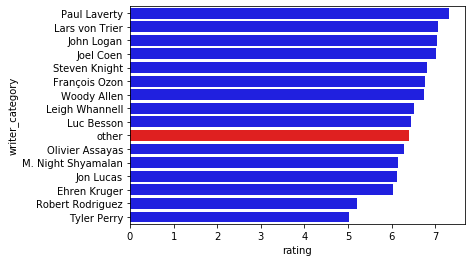

In [42]:
sns.barplot(y='writer_category',x='rating',data=writer_mean_rating, palette=palette_writer)

In [ ]:
# movies writen by Robert Rodriguez  and Tyler Perry are not well rated in average

2. Director

In [43]:
director_mean_rating=df2[['rating','director_category']].groupby(by='director_category', as_index=False).mean().sort_values(by=['rating'], ascending=False)

In [44]:
director_mean_rating

,director_category,rating
12,Steven Spielberg,7.200000
1,Clint Eastwood,7.129412
6,Richard Linklater,7.071429
7,Ridley Scott,7.033333
8,Ron Howard,6.933333
0,Antoine Fuqua,6.818182
3,François Ozon,6.800000
13,Tim Burton,6.763636
15,Woody Allen,6.747368
10,Stephen Frears,6.727273


In [45]:
palette_director={x:('blue' if x!='other' else 'red') for x in list(df2.director_category.unique())}

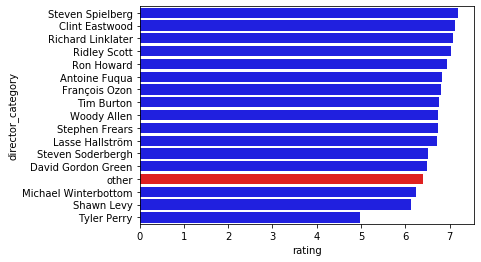

In [46]:
sns.barplot(y='director_category',x='rating',data=director_mean_rating, palette=palette_director)

In [ ]:
# movies directed by Tyler Perry are not well rated in average

3. Country

In [47]:
country_mean_rating=df2[['rating','country_category']].groupby(by='country_category', as_index=False).mean().sort_values(by=['rating'], ascending=False)

In [48]:
country_mean_rating

,country_category,rating
11,South Korea,7.222034
10,Japan,7.144000
3,Denmark,6.955556
15,other,6.929175
9,Italy,6.842623
7,India,6.831111
6,Hong Kong,6.767347
4,France,6.692167
8,Ireland,6.639216
12,Spain,6.631818


In [49]:
palette_country={x:('blue' if x!='other' else 'red') for x in list(df2.country_category.unique())}

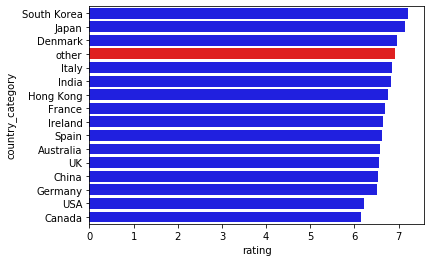

In [50]:
sns.barplot(y='country_category',x='rating',data=country_mean_rating, palette=palette_country)

In [ ]:
# movies from South Korea and Japan have a high average rating
# movies from USA and Canada have a low average rating

# movies from South Korea and Japan that appear on imdb are those that have been seen worldwide and must be of high quality
# all movies from USA and Canada appear on imdb, the best and the worst
# this could explain this result

4. Stars

In [58]:
lst_star=[x for x in categorical_columns if x.startswith('star_')]

In [71]:
lst_mean_rating=[]
for star in lst_star:
    lst_mean_rating.append(df2[['rating',star]].groupby(star).mean().rating.to_list())

In [80]:
star_mean_rating=pd.DataFrame(lst_mean_rating, index=lst_star)

In [81]:
star_mean_rating

,0,1
star_Nicolas Cage,6.411514,5.697872
star_Samuel L. Jackson,6.407086,6.273171
star_Robert De Niro,6.407129,6.251351
star_Nicole Kidman,6.406207,6.408333
star_Ewan McGregor,6.404921,6.640000
star_Morgan Freeman,6.405857,6.471429
star_Bruce Willis,6.408491,5.985294
star_Mark Wahlberg,6.406062,6.436364
star_James Franco,6.408045,6.057576
star_Julianne Moore,6.405776,6.490909


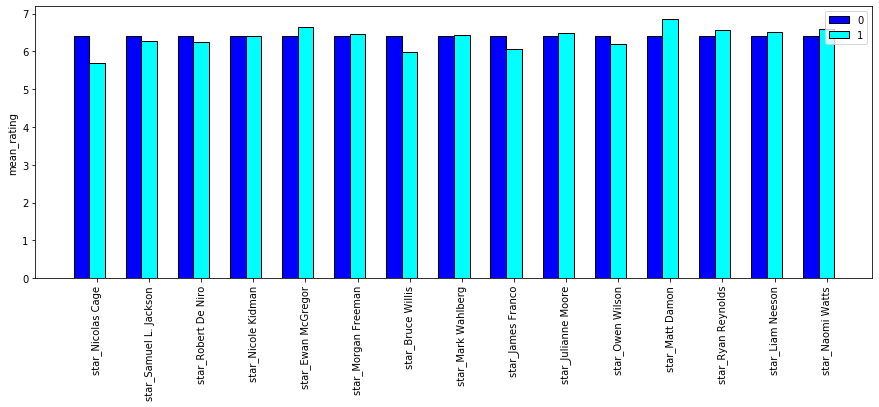

In [87]:
plt.figure(figsize=(15,5))
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars0 = star_mean_rating[0]
 
# Choose the height of the cyan bars
bars1 = star_mean_rating[1]
  
# The x position of bars
r0 = np.arange(len(bars0))
r1 = [x + barWidth for x in r0]
 
# Create blue bars
plt.bar(r0, bars0, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='0')
 
# Create cyan bars
plt.bar(r1, bars1, width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, label='1')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], lst_star, rotation=90)
plt.ylabel('mean_rating')
plt.legend()
 
# Show graphic
plt.show()


In [106]:
star_mean_rating[0]-star_mean_rating[1]

star_Nicolas Cage         0.713642
star_Samuel L. Jackson    0.133915
star_Robert De Niro       0.155778
star_Nicole Kidman       -0.002126
star_Ewan McGregor       -0.235079
star_Morgan Freeman      -0.065571
star_Bruce Willis         0.423197
star_Mark Wahlberg       -0.030302
star_James Franco         0.350469
star_Julianne Moore      -0.085133
star_Owen Wilson          0.216438
star_Matt Damon          -0.446034
star_Ryan Reynolds       -0.169637
star_Liam Neeson         -0.116243
star_Naomi Watts         -0.182201
dtype: float64

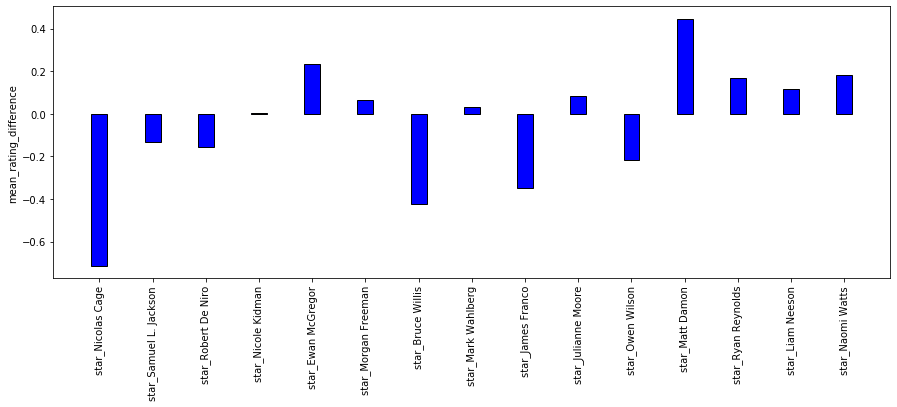

In [115]:
plt.figure(figsize=(15,5))
# width of the bars
barWidth = 0.3
 
# Choose the height of the bars
bars = star_mean_rating[1]-star_mean_rating[0]
 
# The x position of bars
r = np.arange(len(bars))
 
# Create blue bars
plt.bar(r, bars, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7)
 
# general layout
plt.xticks(r, lst_star, rotation=90)
plt.ylabel('mean_rating_difference')
 
# Show graphic
plt.show()

In [ ]:
# movies with Matt Damon have the highest average positive rating difference with movies without Matt Damon

# movies with Nicolas Cage have the highest average negative rating difference with movies without Nicolas Cage

5. Languages

In [88]:
lst_language=[x for x in categorical_columns if x.startswith('language_')]

In [89]:
lst_mean_rating=[]
for language in lst_language:
    lst_mean_rating.append(df2[['rating',language]].groupby(language).mean().rating.to_list())

In [90]:
language_mean_rating=pd.DataFrame(lst_mean_rating, index=lst_language)

In [91]:
language_mean_rating

,0,1
language_English,7.079601,6.322435
language_French,6.359956,6.702336
language_Spanish,6.395274,6.487850
language_German,6.380630,6.758508
language_Italian,6.394975,6.644912
language_Japanese,6.388486,6.800000
language_Russian,6.393698,6.684249
language_Mandarin,6.398610,6.617727
language_Arabic,6.394101,6.818232


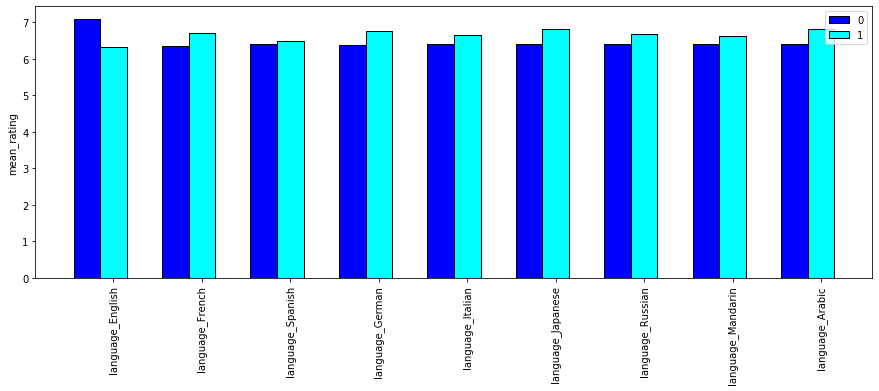

In [92]:
plt.figure(figsize=(15,5))
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars0 = language_mean_rating[0]
 
# Choose the height of the cyan bars
bars1 = language_mean_rating[1]
  
# The x position of bars
r0 = np.arange(len(bars0))
r1 = [x + barWidth for x in r0]
 
# Create blue bars
plt.bar(r0, bars0, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='0')
 
# Create cyan bars
plt.bar(r1, bars1, width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, label='1')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], lst_language, rotation=90)
plt.ylabel('mean_rating')
plt.legend()
 
# Show graphic
plt.show()


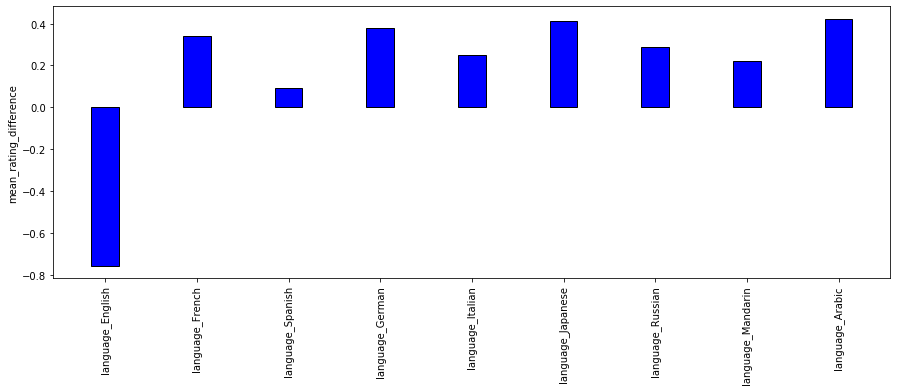

In [114]:
plt.figure(figsize=(15,5))
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars = language_mean_rating[1]-language_mean_rating[0]

# The x position of bars
r = np.arange(len(bars))
 
# Create blue bars
plt.bar(r, bars, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7)

# general layout
plt.xticks(r, lst_language, rotation=90)
plt.ylabel('mean_rating_difference')
 
# Show graphic
plt.show()


In [ ]:
# movies in the english language are very common. On the contrary, the movies that are not in english are movies (like those from South Korea and Japan) that must be of high quality to appear on imdb, explaining their highest average rating   

6. Genres

In [93]:
lst_genre=[x for x in categorical_columns if x.startswith('genre_')]

In [94]:
lst_mean_rating=[]
for genre in lst_genre:
    lst_mean_rating.append(df2[['rating',genre]].groupby(genre).mean().rating.to_list())

In [95]:
genre_mean_rating=pd.DataFrame(lst_mean_rating, index=lst_genre)

In [96]:
genre_mean_rating

,0,1
genre_Drama,6.004565,6.645654
genre_Romance,6.403294,6.418672
genre_War,6.394365,6.923239
genre_Thriller,6.443563,6.213883
genre_Crime,6.395123,6.457498
genre_Adult,6.406394,5.300000
genre_Music,6.402284,6.523902
genre_Horror,6.483591,5.781375
genre_Family,6.424222,6.037627
genre_Comedy,6.512179,6.217639


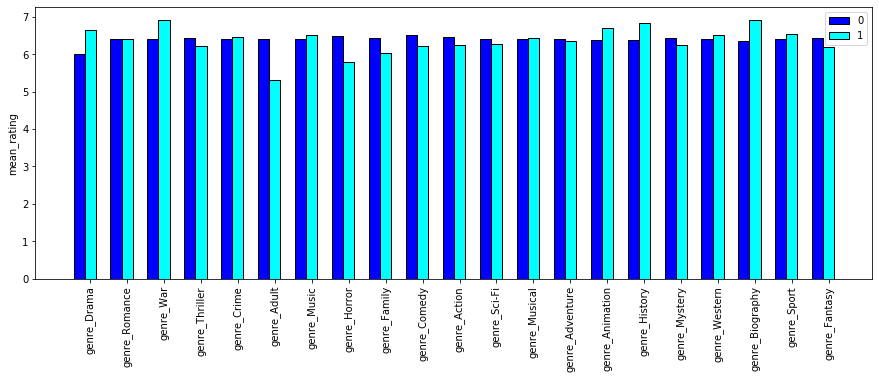

In [97]:
plt.figure(figsize=(15,5))
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars0 = genre_mean_rating[0]
 
# Choose the height of the cyan bars
bars1 = genre_mean_rating[1]
  
# The x position of bars
r0 = np.arange(len(bars0))
r1 = [x + barWidth for x in r0]
 
# Create blue bars
plt.bar(r0, bars0, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='0')
 
# Create cyan bars
plt.bar(r1, bars1, width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, label='1')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], lst_genre, rotation=90)
plt.ylabel('mean_rating')
plt.legend()
 
# Show graphic
plt.show()


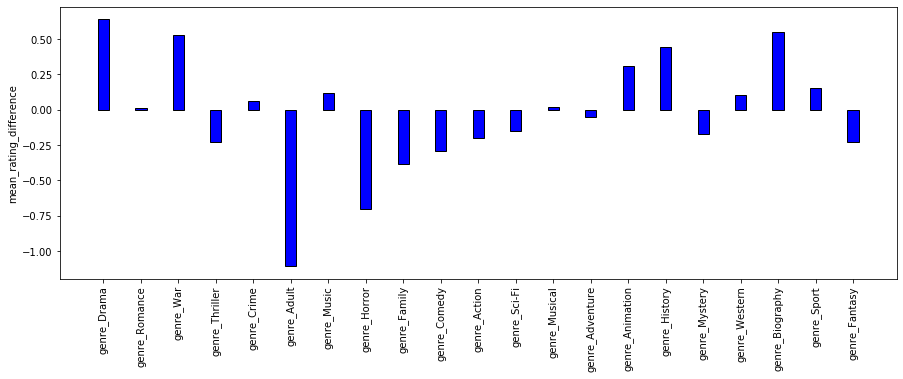

In [113]:
plt.figure(figsize=(15,5))
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars = genre_mean_rating[1]-genre_mean_rating[0]
 
# The x position of bars
r = np.arange(len(bars))
 
# Create blue bars
plt.bar(r, bars, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7)

# general layout
plt.xticks(r , lst_genre, rotation=90)
plt.ylabel('mean_rating_difference')
 
# Show graphic
plt.show()

In [ ]:
# adult movies have a very low average rating: most of these movies are not of the highest quality compared to non-pornographic movies

7. Keywords

In [98]:
lst_keyword=[x for x in categorical_columns if x.startswith('k_')]

In [99]:
lst_mean_rating=[]
for k in lst_keyword:
    lst_mean_rating.append(df2[['rating',k]].groupby(k).mean().rating.to_list())

In [100]:
keyword_mean_rating=pd.DataFrame(lst_mean_rating, index=lst_keyword)

In [101]:
keyword_mean_rating

,0,1
k_nudity,6.420930,6.269643
k_sex,6.410707,6.354635
k_f rated,6.403815,6.527642
k_murder,6.407875,6.315044
k_love,6.408852,6.219318
k_female protagonist,6.406849,6.360465
k_friendship,6.402191,6.709639
k_revenge,6.404173,6.564198
k_police,6.402574,6.691250
k_new york city,6.403788,6.598734


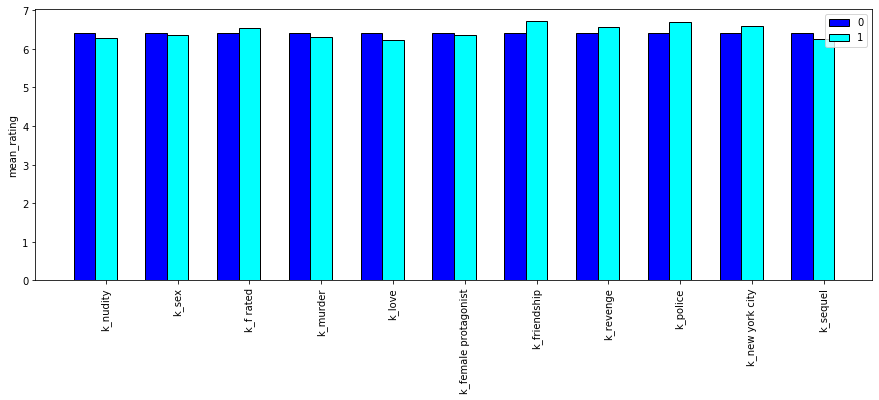

In [102]:
plt.figure(figsize=(15,5))
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars0 = keyword_mean_rating[0]
 
# Choose the height of the cyan bars
bars1 = keyword_mean_rating[1]
  
# The x position of bars
r0 = np.arange(len(bars0))
r1 = [x + barWidth for x in r0]
 
# Create blue bars
plt.bar(r0, bars0, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='0')
 
# Create cyan bars
plt.bar(r1, bars1, width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, label='1')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], lst_keyword, rotation=90)
plt.ylabel('mean_rating')
plt.legend()
 
# Show graphic
plt.show()


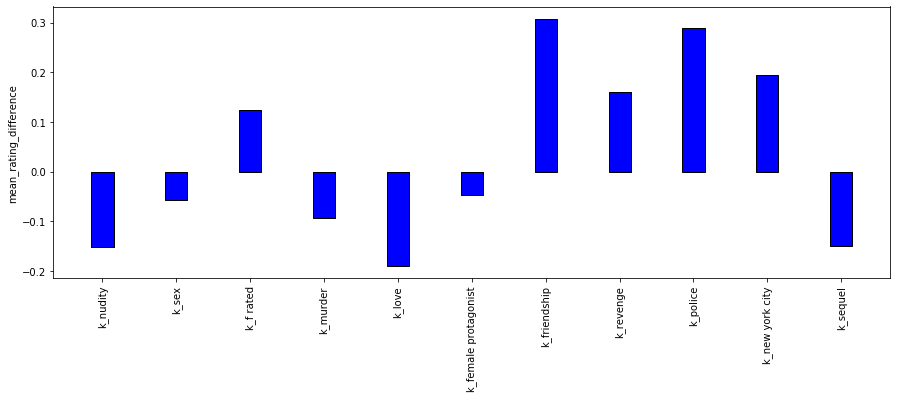

In [112]:
plt.figure(figsize=(15,5))
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars = keyword_mean_rating[1]-keyword_mean_rating[0]
  
# The x position of bars
r = np.arange(len(bars))
 
# Create blue bars
plt.bar(r, bars, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7)
 
# general layout
plt.xticks(r , lst_keyword, rotation=90)
plt.ylabel('mean_rating_difference')
 
# Show graphic
plt.show()


In [ ]:
# movies with keyword 'sex' and 'nudity' might be associated with the genre 'adult': the rating difference is negative